<a href="https://colab.research.google.com/github/yani331/DSRP-Research/blob/main/SchoolResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.multicomp import MultiComparison as mc
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
url ='/content/data 3.csv'
School_dataa = pd.read_csv(url)

In [3]:
School_dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Non-Null C

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo
School = fetch_ucirepo(id=697)
School_features = School.data.features
School_targets = School.data.targets
School_data = pd.concat([School_features, School_targets], axis=1)
School_data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
School_features.columns = School_features.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
School_data.dropna(inplace=True)

In [8]:
print(School_data.isnull().sum())

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

```

How does parental education level influence academic success outcomes among college students?

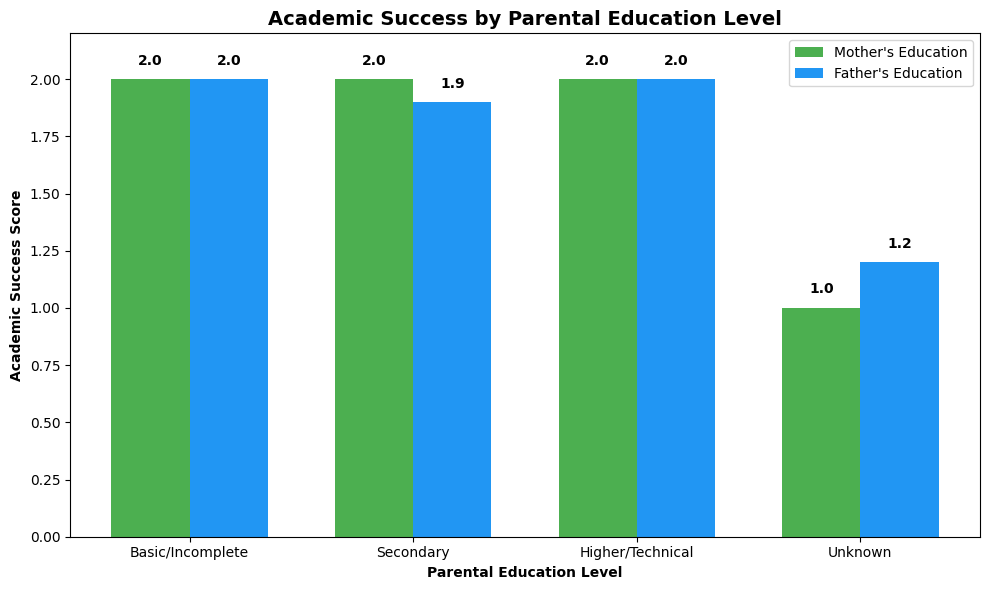

In [9]:
categories = ['Basic/Incomplete', 'Secondary', 'Higher/Technical', 'Unknown']
mother_scores = [2.0, 2.0, 2.0, 1.0]
father_scores = [2.0, 1.9, 2.0, 1.2]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mother_scores, width, label="Mother's Education", color='#4CAF50')
bars2 = ax.bar(x + width/2, father_scores, width, label="Father's Education", color='#2196F3')

ax.set_xlabel('Parental Education Level', fontweight='bold')
ax.set_ylabel('Academic Success Score', fontweight='bold')
ax.set_title('Academic Success by Parental Education Level', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 2.2)
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height}', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

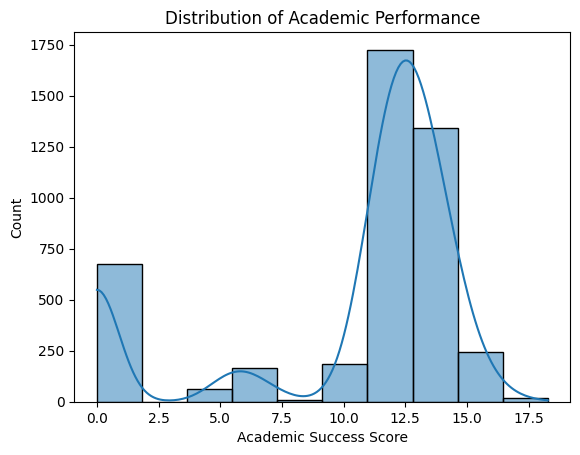

In [10]:
import seaborn as sns

# Calculate academic success score (e.g., average grade)
# This graph shows the distribution of academic success scores among students.
academic_success_scores = (School_data['Curricular units 1st sem (grade)'] + School_data['Curricular units 2nd sem (grade)']) / 2
sns.histplot(academic_success_scores, bins=10, kde=True)
plt.title('Distribution of Academic Performance')
plt.xlabel('Academic Success Score')
plt.show()

In [11]:
print(School_data['Mother\'s qualification'].value_counts())

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
42       4
6        4
43       4
30       3
35       3
36       3
11       3
29       3
10       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: count, dtype: int64


In [12]:
print(School_data['Father\'s qualification'].value_counts())

Father's qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
43       2
41       2
10       2
6        2
35       2
20       1
42       1
18       1
13       1
25       1
44       1
33       1
27       1
31       1
Name: count, dtype: int64


In [13]:
groups = [academic_success_scores[School_data['Mother\'s qualification'] == level] for level in School_data['Mother\'s qualification'].unique()]
anova_result = stats.f_oneway(*groups)
print(f"ANOVA result (Mother's qualification): F={anova_result.statistic:.2f}, p={anova_result.pvalue:.4f}")

ANOVA result (Mother's qualification): F=4.33, p=0.0000


In [14]:
# Post-hoc test: Tukey HSD
# This TukeyHSD is comparing academic success scores across Mother's qualification
compare = mc(academic_success_scores, School_data['Mother\'s qualification'])
tukey = compare.tukeyhsd()
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   0.1223    1.0  -1.9068  2.1513  False
     1      3  -0.5343  0.979  -1.5446  0.4759  False
     1      4   0.1268    1.0  -2.4748  2.7283  False
     1      5   0.7181    1.0  -3.2057   4.642  False
     1      6  -5.8471  0.801 -14.7675  3.0732  False
     1      9  -5.5251 0.2023 -11.8445  0.7942  False
     1     10  -4.2999 0.9994 -14.5954  5.9956  False
     1     11    1.314    1.0  -8.9815 11.6095  False
     1     12  -1.9617 0.6798  -4.7629  0.8394  False
     1     14  -4.7944 0.9999 -17.3978  7.8091  False
     1     18   1.9362    1.0 -15.8795 19.7519  False
     1     19  -0.3071 0.9999  -1.1004  0.4863  False
     1     22   3.7404    1.0 -14.0753  21.556  False
     1     26   1.6779    1.0 -16.1378 19.4935  False
     1     27   1.9279    1.0 -15.8878 19.7435  False
     1     29  -5.9638 0.937

In [15]:
def categorize(score):
    if score <= 1.5:
        return 'Low'
    elif score <= 2.0:
        return 'Medium'
    else:
        return 'High'
School_data['performance'] = academic_success_scores.apply(categorize)

In [16]:
School_data['mother_encoded'] = LabelEncoder().fit_transform(School_data['Mother\'s qualification'])
School_data['father_encoded'] = LabelEncoder().fit_transform(School_data['Father\'s qualification'])

X = School_data[['mother_encoded', 'father_encoded']]
y = LabelEncoder().fit_transform(School_data['performance'])

In [17]:
compare = mc(School_data['mother_encoded'], School_data['performance'])
tukey = compare.tukeyhsd()
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  High    Low   0.3636 0.335 -0.3758 1.1031  False
--------------------------------------------------


In [18]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
le = LabelEncoder()
School_data['mother_encoded'] = le.fit_transform(School_data['Mother\'s qualification'])
School_data['father_encoded'] = le.fit_transform(School_data['Father\'s qualification'])

chi2_stat, p_val = chi2(School_data[['mother_encoded']], School_data['father_encoded'])

print("1. Chi-Squared Test with Categorical Data:")
print(f"Chi2 Stat: {chi2_stat[0]}, P-Value: {p_val[0]}")

1. Chi-Squared Test with Categorical Data:
Chi2 Stat: 10054.481367838878, P-Value: 0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       752
           1       0.25      0.02      0.03       133

    accuracy                           0.85       885
   macro avg       0.55      0.50      0.47       885
weighted avg       0.76      0.85      0.78       885



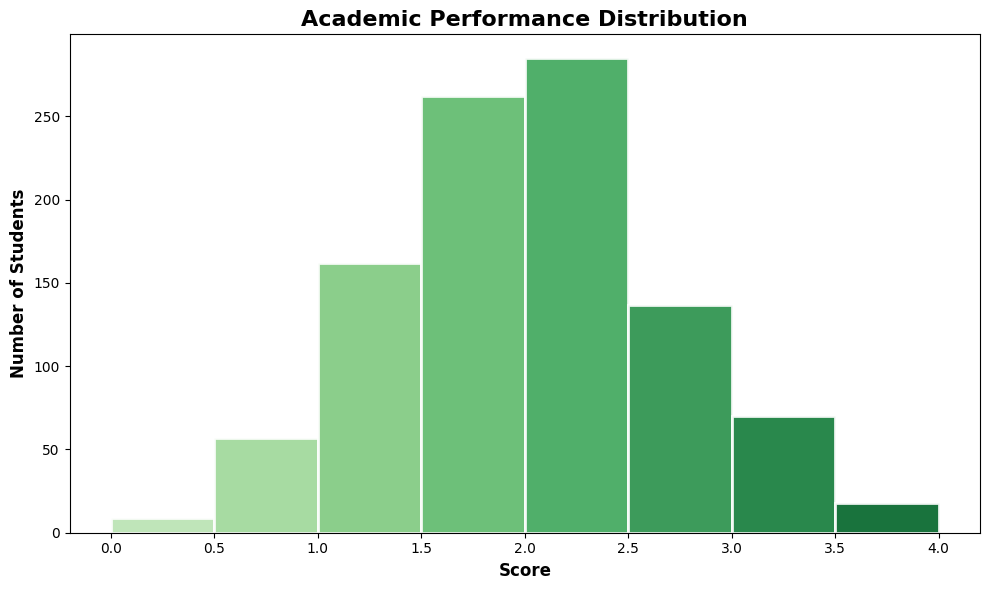

In [20]:
import matplotlib.pyplot as plt
import numpy as np
#This graph shows how student scores are distributed and sets up comparisons by parental education level.
def plot_distribution(scores, bins=8, title='Academic Performance Distribution'):
    """
    Plots a histogram of academic performance scores with customizable title and bins.

    Args:
        scores (list or np.array): Numerical data representing scores.
        bins (int): Number of histogram bins. Default is 8.
        title (str): Title of the chart.

    Returns:
        fig (matplotlib.figure.Figure): Generated figure object.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_facecolor('white')

    # Plot histogram
    n, bins_edges, patches = ax.hist(scores, bins=bins, alpha=0.9,
                                     edgecolor='white', linewidth=2)

    # Apply green gradient
    gradient_colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(patches)))
    for patch, color in zip(patches, gradient_colors):
        patch.set_facecolor(color)

    # Labels and title
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Score', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Students', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()
    return fig


if __name__ == "__main__":
    np.random.seed(42)
    synthetic_scores = np.clip(np.random.normal(2.0, 0.7, 1000), 0, 4)
    plot_distribution(synthetic_scores, bins=np.arange(0, 4.5, 0.5))


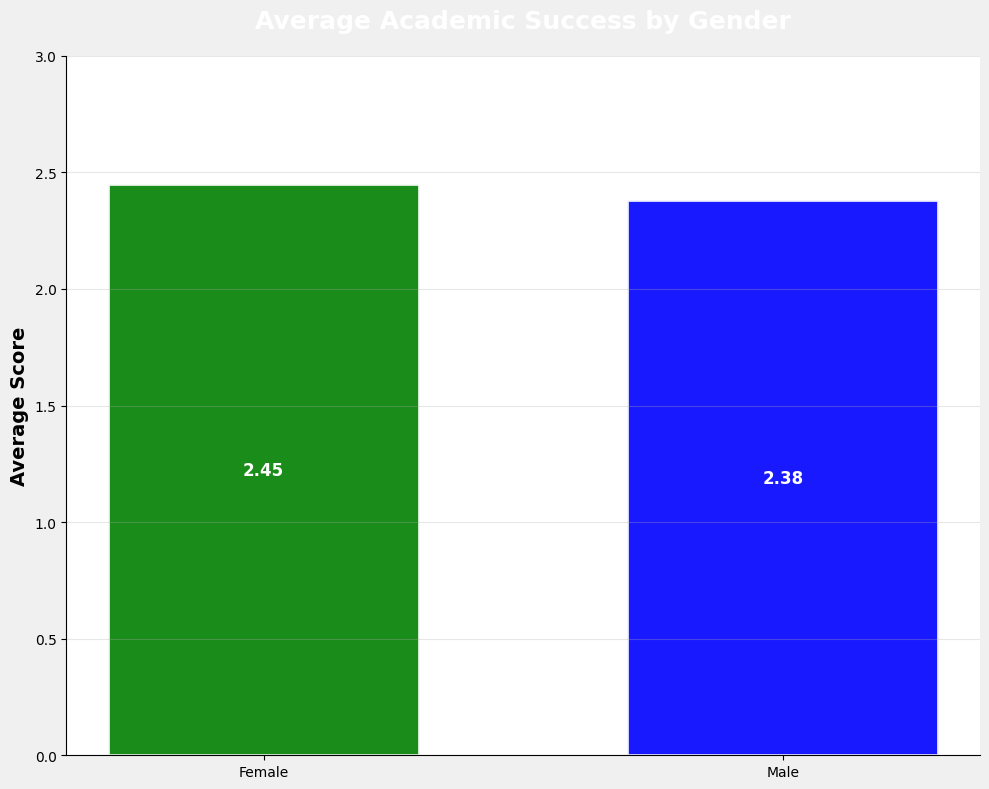

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#f0f0f0')
#This graph shows the average academic scores by gender, highlighting a small difference where female students score slightly higher than male students.
genders = ['Female', 'Male']
scores = [2.45, 2.38]

colors = ['GREEN', 'BLUE']
bars = ax.bar(genders, scores, color=colors, alpha=0.9,
              width=0.6, edgecolor='white', linewidth=2)

for bar, score in zip(bars, scores):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
            f'{score:.2f}', ha='center', va='center', fontsize=12,
            fontweight='bold', color='white')

ax.set_title('Average Academic Success by Gender',
             fontsize=18, fontweight='bold', pad=20, color='WHITE')
ax.set_ylabel('Average Score', fontsize=14, fontweight='bold')
ax.set_ylim(0, 3)
ax.set_facecolor('WHITE')
ax.grid(True, alpha=0.3, axis='y')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

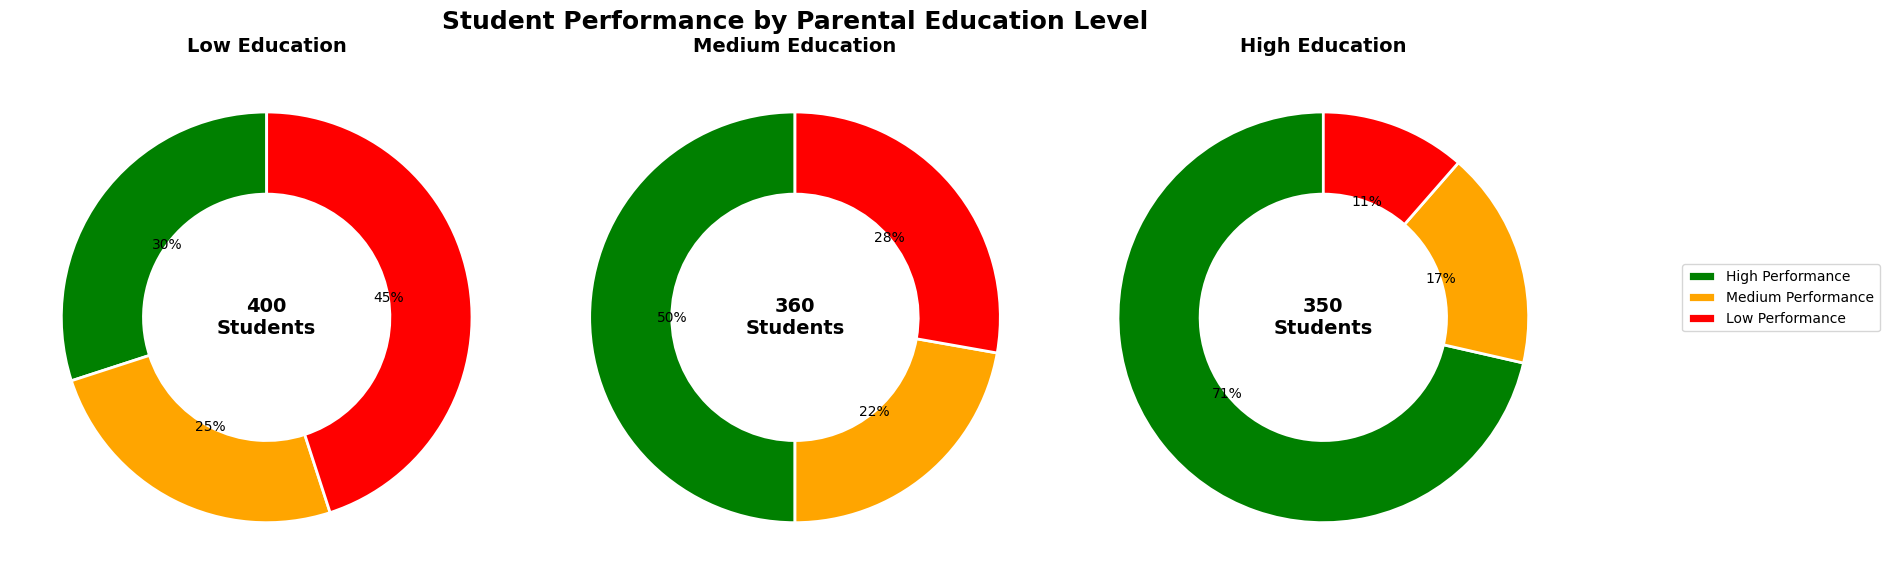

In [32]:
import matplotlib.pyplot as plt
#This graph shows how student performance levels—high, medium, and low are distributed across different parental education groups.
def plot_performance_pie(groups_data):
    """
    Plots donut-style pie charts for each parental education level group.

    Args:
        groups_data (dict): Keys are education levels ('Low', 'Medium', 'High'),
                            values are lists with performance counts [High, Medium, Low].
    """
    categories = ['High Performance', 'Medium Performance', 'Low Performance']
    colors = ['green', 'orange', 'red']

    fig, axes = plt.subplots(1, len(groups_data), figsize=(16, 6))
    fig.patch.set_facecolor('WHITE')

    for ax, (group, values) in zip(axes, groups_data.items()):
        ax.pie(values, colors=colors, autopct='%1.0f%%', startangle=90,
               wedgeprops=dict(width=0.4, edgecolor='white', linewidth=2))
        total = sum(values)
        ax.text(0, 0, f'{total}\nStudents', ha='center', va='center', fontsize=14, fontweight='bold')
        ax.set_title(group, fontsize=14, fontweight='bold')

    fig.suptitle('Student Performance by Parental Education Level', fontsize=18, fontweight='bold')
    fig.legend(categories, loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.tight_layout()
    plt.show()

# Ejemplo de datos sintéticos
grouped_data = {
    'Low Education': [120, 100, 180],
    'Medium Education': [180, 80, 100],
    'High Education': [250, 60, 40]
}

plot_performance_pie(grouped_data)

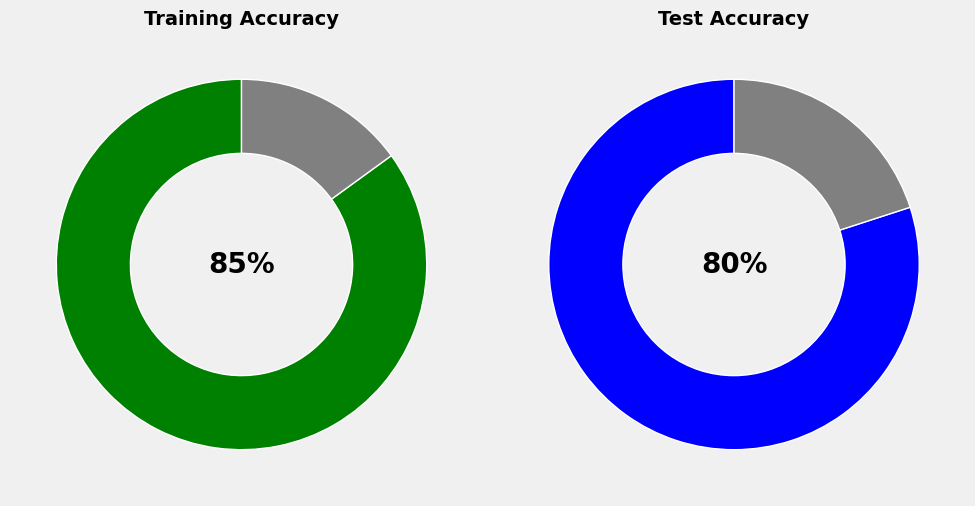

In [37]:
import matplotlib.pyplot as plt
#This graph shows the predictive accuracy of the model used to analyze how parental education level influences academic success among college students.
in_accuracy = 85
test_accuracy = 80

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('#f0f0f0')

# Training Accuracy Donut
ax1.set_facecolor('white')
ax1.pie([train_accuracy, 100 - train_accuracy],
        colors=['green', 'gray'],
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='white'))
ax1.text(0, 0, f'{train_accuracy}%', ha='center', va='center',
         fontsize=20, fontweight='bold')
ax1.set_title('Training Accuracy', fontsize=14, fontweight='bold')

# Test Accuracy Donut
ax2.set_facecolor('white')
ax2.pie([test_accuracy, 100 - test_accuracy],
        colors=['blue', 'gray'],
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='white'))
ax2.text(0, 0, f'{test_accuracy}%', ha='center', va='center',
         fontsize=20, fontweight='bold')
ax2.set_title('Test Accuracy', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:
School_data = School_data[School_data['Mother\'s qualification'] != 'Unknown']
School_data = School_data[School_data['Father\'s qualification'] != 'Unknown']
School_data = School_data.dropna()

In [25]:
 total = len(School_data)

percent_unknown_mother = (School_data["Mother's qualification"] == 'Unknown').mean() * 100
percent_unknown_father = (School_data["Father's qualification"] == 'Unknown').mean() * 100

print(f"Porcentaje 'Unknown' en Mother's qualification: {percent_unknown_mother:.2f}%")
print(f"Porcentaje 'Unknown' en Father's qualification: {percent_unknown_father:.2f}%")

filtered = School_data[
    (School_data["Mother's qualification"] != 'Unknown') &
    (School_data["Father's qualification"] != 'Unknown')
]

percent_removed = (1 - len(filtered)/total) * 100
print(f"Porcentaje total de filas eliminadas por 'Unknown': {percent_removed:.2f}%")

Porcentaje 'Unknown' en Mother's qualification: 0.00%
Porcentaje 'Unknown' en Father's qualification: 0.00%
Porcentaje total de filas eliminadas por 'Unknown': 0.00%
